In [1]:
from os import makedirs
from urllib.request import urlretrieve

In [ ]:
# データの取得
makedirs("data", exist_ok=True)
urlretrieve("https://git.io/vXTVC", "data/txtdata.csv")

In [2]:
import numpy as np
import pymc as pm
import matplotlib.pyplot as plt

In [3]:
data = np.loadtxt("data/txtdata.csv")
N = len(data)

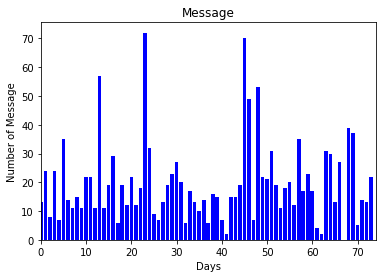

In [4]:
# データの可視化
plt.bar(np.arange(N), data, color = "b")
plt.xlabel("Days")
plt.ylabel("Number of Message")
plt.title("Message")
plt.xlim(0, N)
plt.show()

In [ ]:
alpha = 1 / data.mean()

# 事前分布は指数分布
#lambda_1 = pm.Exponential("lambda_1", alpha)
#lambda_2 = pm.Exponential("lambda_2", alpha)

# 事前分布を一様分布にしてみる
lambda_1 = pm.Uniform("lambda_1", upper = (data.mean() * 2), lower = 0)
lambda_2 = pm.Uniform("lambda_2", upper = (data.mean() * 2), lower = 0)

# 変化した日にちtau
tau = pm.DiscreteUniform("tau", lower = 0, upper = N)

# ポアソン分布のパラメータ
# tau日より前はlambda_1, あとはlambda_2
lam = pm.Lambda("lam", lambda tau = tau, lambda_1 = lambda_1, lambda_2 = lambda_2: np.array([(lambda_1 if (i < tau) else lambda_2)for i in range(N)]))
# 観測結果の指定
observe = pm.Poisson("obs", lam, value = data, observed = True)

model = pm.Model([observe, lambda_1, lambda_2, tau])

mcmc = pm.MCMC()
# 50000回サンプリングして10000個捨てる, 10個づつ記録する
mcmc.sample(50000, 10000, thin=10)

In [ ]:
plt.close()
pm.Matplot.plot(mcmc.trace("tau"), common_scale=False)
pm.Matplot.plot(mcmc.trace("lambda_1"), common_scale=False)
pm.Matplot.plot(mcmc.trace("lambda_2"), common_scale=False)
plt.show()


In [ ]:
print(mcmc.lambda_1.summary())
print(mcmc.lambda_2.summary())